<a href="https://colab.research.google.com/github/dz-web3/DS-Tech-2026spring/blob/main/Module1_Bash_Pandas/Dealing_with_data.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>

In [ ]:
#If opening in colab run this cell
!git clone https://github.com/dz-web3/DS-Tech-2026spring.git
%cd DS-Tech-2024spring/Module1_Bash_Pandas

fatal: destination path 'DS-Tech-2024spring' already exists and is not an empty directory.
/content/DS-Tech-2024spring/Module1_Bash_Pandas


# Python and Pandas Data Frames


Spring 2026 - Instructors: Foster Provost and Baotong Zhang

Teaching Assistant: Baotong Zhang

***

## Python Packages and Built-in Functions

Python has a ton of packages that make doing complicated stuff very easy. We won't discuss how to install packages, or give a detailed list of what packages exist, but we will give a brief description about how they are used.

An easy way to think of why package are useful is by thinking: "**Python packages give us access to MANY functions**".

Packages contain pre-defined functions (built-in) that make our life easier!  We've seen pre-defined functions before, for example, the function 'str()' that we used to convert numbers into strings in the Python Basics notebook.

In this class we will use five packages frequently: `pandas`, `sklearn`, `matplotlib`,  `seaborn`, and `numpy`:

- **`pandas`** is a data manipulation package. It lets us store data in a data frame--which is the basic data structure used in data analytics. More on this soon.
- **`sklearn`** is a machine learning and data science package. It lets us do fairly complicated machine learning tasks, such as building regression or probability estimation models with only a few lines of code. (Nice!)
- **`matplotlib`** is a data visualization package.  It lets you make plots and graphs directly from your code. This can be a secret weapon when combined with notebooks, as you can very easily rerun analyses on different data or with slightly different code, and the graphs can just appear magically.  (Ok, always easier said than done, but you get the idea.)
- **`seaborn`** is an extension to matplotlib that helps make your plots look more appealing.
- **`numpy`** (pronounced num-pie) is used for doing "math stuff", such as complex mathematical operations (e.g., square roots, exponents, logs), operations on matrices, and more.

As we use these through the semester, their usefulness will become increasingly apparent.

To make the contents of a package available, you need to **import** it:

In [ ]:
# load entire package
import pandas
import sklearn
import matplotlib
import numpy
import seaborn

Sometimes it is easier to use short names for packages. This has become the norm now, so let's do it so that you recognize it if you encounter it in your work.

In [ ]:
# Load package and assign to shorter variable name
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# this trick is required to get plots to display inline with the rest of your notebook,
# not in a separate window
%matplotlib inline

# just some stylistic tweaks for seaborn
sns.set(style='ticks', palette='Set2')

We can now use package-specific things. For example, numpy has a function called `sqrt()` which will give us the square root of a numpy number. Since it is part of numpy, we need to tell Python that that's where it is by using a dot (e.g., `np.sqrt()`).

In the following cell you can also see how to write **comments** in your code. Take my advice: **Write comments as you go**.  It's helpful when you want to collaborate, then you don't have to figure out what you did to explain it to your collaborator.  But even more: often you need to come back to **your own** analysis weeks, months, or even years later, and you will thank yourself for explaining what you did!

In [ ]:
# First I'll just set up some very simple data structures for what follows
some_list = [0,0,1,2,3,3,4.5,7.6]
print(some_list)
some_dictionary = {'student1': '(929)-000-0000', 'student2': '(917)-000-0000', 'student3': '(470)-000-0000'}
print(some_dictionary)
some_set = set( [1,2,4,4,5,5] )
print(some_set)


# In this part of the code I am demonstrating using numpy (np) functions
print ("Square root: " + str ( np.sqrt(25) ))
print ("Maximum element of our previous list: " + str( np.max(some_list) ))

# In this part of the code I am using "regular" python functions
print ("Number of elements in our previous list: " + str( len(some_list) ))
print ("Sum of elements in our previous list: " + str( sum(some_list) ))
print ("Range of 5 numbers (remember we start with 0): " + str( range(5) ))

# #Bonus LIST COMPREHENSIONS (google it!)
# some_list_squared = [i*i for i in some_list]
# #This is the same as:
# some_list_squared_too = []
# for i in some_list:
#     some_list_squared_too.append(i*i)

# print(f"some_list_squared: {some_list_squared} = some_list_squared_too:{some_list_squared_too}")



[0, 0, 1, 2, 3, 3, 4.5, 7.6]
{'student1': '(929)-000-0000', 'student2': '(917)-000-0000', 'student3': '(470)-000-0000'}
{1, 2, 4, 5}
Square root: 5.0
Maximum element of our previous list: 7.6
Number of elements in our previous list: 8
Sum of elements in our previous list: 21.1
Range of 5 numbers (remember we start with 0): range(0, 5)


What about the package **Pandas**?

Pandas gives us the **DATAFRAME** -- one of the main data structures used in data analytics.

A Dataframe is 2-dimensional data structure with columns of potentially different types, along with column and row labels. It is generally the most commonly used pandas object. Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. It's often convenient to think of it as a spreadsheet with super powers! [More details here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

Pandas data frames can be constructed from most common data sources a data scientist will encounter: csv files, excel spreadsheets, sql databases, json, url pointers to other data sources, and even from other data already stored in one's python code.

Let's take a look at **creating** a data frame from a common "toy" dataset presenting automobile mpg information.


In [ ]:
# This reads the data from a url and sets the column names.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name']
mpg_df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

/tmp/ipython-input-4110784668.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mpg_df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)


We now have the data loaded in a pandas data frame, as a starter, let's see some of the (MANY!) ways pandas makes it convenient to explore a dataset

In [ ]:
# First, just get a peek at the data:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
# Some general stats about the data
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Info about the rows and columns themselves
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model         406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [ ]:
# How many of each type of engine?
mpg_df["cylinders"].value_counts()

,count
cylinders,
4.0,207
8.0,108
6.0,84
3.0,4
5.0,3


In [ ]:
# Total horsepower
mpg_df["horsepower"].sum()

np.float64(42033.0)

In [ ]:
# Average horsepower per engine type
mpg_df.groupby("cylinders").horsepower.mean()

,horsepower
cylinders,
3.0,99.250000
4.0,78.470297
5.0,82.333333
6.0,101.506024
8.0,158.453704


array([[<Axes: title={'center': 'mpg'}>]], dtype=object)

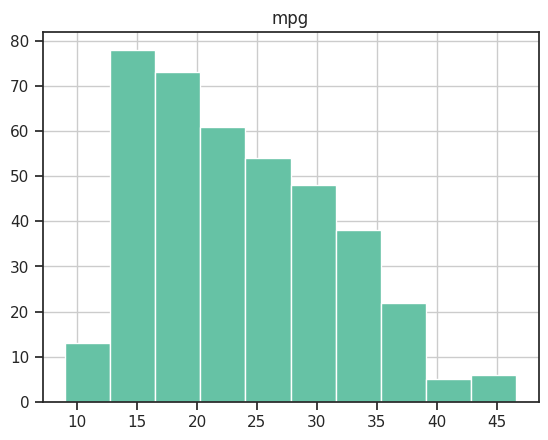

In [ ]:
# Plot a histogram of mpg
mpg_df.hist("mpg")

<Axes: xlabel='acceleration', ylabel='mpg'>

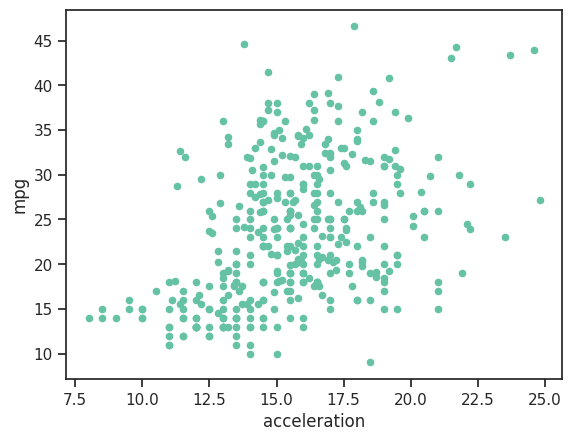

In [ ]:
# Or a scatter plot of acceleration vs mpg
mpg_df.plot(kind="scatter", x="acceleration", y="mpg")

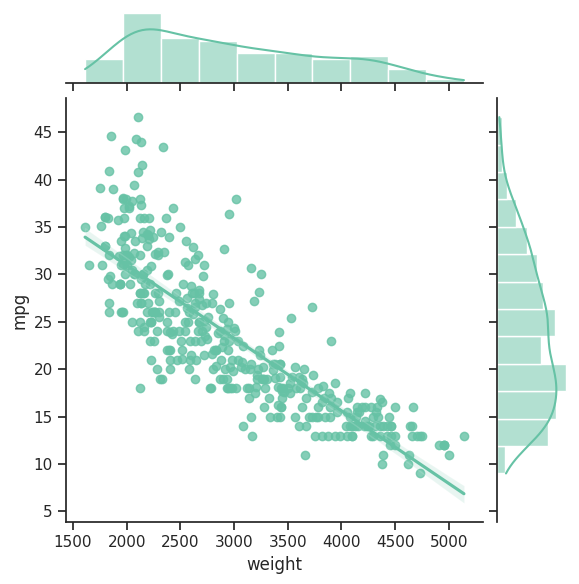

In [ ]:
# Some pretty plotting comparing weight to mpg and adding a regression line in seaborn
sns.jointplot(data = mpg_df, x = "weight", y= "mpg", kind="reg")

Pandas is widely used and has a very active development community contributing new features. If there is some kind of analysis you want to do on your data, chances are, it already exists. The [documentation for the pandas library](https://pandas.pydata.org/pandas-docs/stable/) is very good, but the site's search functionality is, unfortunately, poor. Google is often better to find the information you need.

One important component of pandas is indexing and selecting components of the data. This is a extremely rich topic, so we'll only touch on it here. Please [consult the documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more info.

In [ ]:
# Columns can be selected using the `[]` operator, which accepts one column name or a list of several
mpg_df[["cylinders", "car_name"]].head(5)

,cylinders,car_name
0,8.0,chevrolet chevelle malibu
1,8.0,buick skylark 320
2,8.0,plymouth satellite
3,8.0,amc rebel sst
4,8.0,ford torino


In [ ]:
# As some "syntactic sugar", pandas also allows selection using the `.column_name` notation
mpg_df.car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [ ]:
# Note that this can also be used for assignment of values!
original_names = mpg_df.car_name.copy()
mpg_df.car_name = original_names + " Test!"
print(mpg_df.car_name.head())
mpg_df.car_name = original_names

0    chevrolet chevelle malibu Test!
1            buick skylark 320 Test!
2           plymouth satellite Test!
3                amc rebel sst Test!
4                  ford torino Test!
Name: car_name, dtype: object


For selecting rows from the data there are two options:
- `.loc`: for selecting rows based on the _row label_
- `.iloc`: for selecting rows based on the _row number_

In the prior example, the row label and the row number are the same; often one wants to assign a label (a unique id) to each rows. In many cases, this would be something like a date or a user id. Note: these two selectors can also be used to pick columns, but that's a bit less common.

In [ ]:
# Returns row #5 -- the 6th row.  NB: it returns one row as a column!
mpg_df.iloc[5]

,5
mpg,15.0
cylinders,8.0
displacement,429.0
horsepower,198.0
weight,4341.0
acceleration,10.0
model,70.0
origin,1.0
car_name,ford galaxie 500


In [ ]:
# Returns the first 6 rows
mpg_df.iloc[:6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500


If we have _actual labels_ as an index for a dataframe, we can use `.loc` to select using values from that index

In [ ]:
#Let's set the row label (index) to be the car name.  Note: these are not unique.
car_index_df = mpg_df.set_index("car_name", inplace=False)
#Now, let's see what we have for a couple car names
car_index_df.loc[["amc rebel sst", "plymouth fury iii"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
car_name,,,,,,,,
amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
plymouth fury iii,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0
plymouth fury iii,14.0,8.0,318.0,150.0,4096.0,13.0,71.0,1.0
plymouth fury iii,15.0,8.0,318.0,150.0,4135.0,13.5,72.0,1.0


One can also select those rows that match a particular condition. Say I want to only see those rows that have an acceleration less that 10 seconds

In [ ]:
mpg_df[mpg_df.acceleration < 10]  #some of the classic muscle cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl
16,14.0,8.0,340.0,160.0,3609.0,8.0,70.0,1.0,plymouth 'cuda 340
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
18,15.0,8.0,400.0,150.0,3761.0,9.5,70.0,1.0,chevrolet monte carlo
123,16.0,8.0,400.0,230.0,4278.0,9.5,73.0,1.0,pontiac grand prix


Often, one wants to create a data frame from information that is available "in code"- these might be results of prior computations that aren't already in pandas or maybe just some small static dataframe that stores some info. There are two common ways to do this: (1) lists-of-lists with an additional list of column names and (2) lists of dictionaries. I prefer the latter since the data in this case is self-descriptive, order isn't important, and missing data is handled more smoothly, but I'll give examples below for both.

In [ ]:
# List-of-lists approach

list1 = ['studentA',22,'(929)-000-000']
list2 = ['studentB',np.nan,'(646)-000-000']
list3 = ['studentC',30,'(917)-000-000']
list4 = ['studentD',31,'(646)-001-001']
list5 = ['studentE',np.nan,'(929)-001-001']
list6 = ['studentF',30,'(917)-001-001']
list7 = ['studentG',30,'(470)-001-001']

list_of_lists = [list1, list2, list3, list4, list5, list6, list7]
column_names = ['Name','Age','Mobile']

lol_df = pd.DataFrame(list_of_lists,columns=column_names)
lol_df.head(5)

,Name,Age,Mobile
0,studentA,22.0,(929)-000-000
1,studentB,NaN,(646)-000-000
2,studentC,30.0,(917)-000-000
3,studentD,31.0,(646)-001-001
4,studentE,NaN,(929)-001-001


In [ ]:
# This is the list of dicts approach
alice = {"name": "alice", "age": 25, "mobile":"555-222-9000"}
bob = {"name": "bob", "age": 100}
casey = {"age":35, "name": "casey", "mobile":"1-877-kars-4kids"}

list_of_dicts = [alice, bob, casey]
lod_df = pd.DataFrame(list_of_dicts)
lod_df.head(5)

,name,age,mobile
0,alice,25,555-222-9000
1,bob,100,NaN
2,casey,35,1-877-kars-4kids


We can also add columns (they should have the same number of rows as the dataframe they are being added to)

In [ ]:
lol_df['Business Major'] = ['yes','no','yes','yes','yes','no','yes']
lol_df['Years Experience'] = [1,4,2,6,0,3,0]
lol_df.head(5)

,Name,Age,Mobile,Business Major,Years Experience
0,studentA,22.0,(929)-000-000,yes,1
1,studentB,NaN,(646)-000-000,no,4
2,studentC,30.0,(917)-000-000,yes,2
3,studentD,31.0,(646)-001-001,yes,6
4,studentE,NaN,(929)-001-001,yes,0



What about operations on entire columns? This can make data munging much easier!  

*For example, when preparing data for predictive modeling (machine learning) we do "feature engineering" -- creating new variables that we believe/hope will be predictive of some target.  We usually want to engineer the same new variables for every data instance (they'll have different values for different instances, in order to be useful).*

Let's take the difference between age and years of experience:


In [ ]:
lol_df["Age"] - lol_df["Years Experience"]

,0
0,21.0
1,NaN
2,28.0
3,25.0
4,NaN
5,27.0
6,30.0


All of the data frames used thus far have had missing values. We see that by default, pandas just displays `NaN`, when the value of a cell is unknown. Sometimes this interferes with the computation we're trying to accomplish. Fortunately, there is a [suite of functionality](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) for dealing with missing data built in.

Let's (for some reason) fill missing age info with the average age when doing our dataframe difference computation..

In [ ]:
lol_df["Age"].fillna(lol_df["Age"].mean()) - lol_df["Years Experience"]

,0
0,21.0
1,24.6
2,28.0
3,25.0
4,28.6
5,27.0
6,30.0


#### Extra added bonus!!   ---  Auto-complete

One of the most useful things about an IPython notebook is its functionality for helping us to figure out Python details.

**In Google Colab:** Simply press `Tab` after typing part of a function or variable name to see auto-complete suggestions. Colab also provides automatic suggestions as you type.

Try this: type `mpg_df.hist` in the cell below and press `Tab`. (Recall that we used this function above.)

Now try it with mpg_df.hist(

Now try it with just mpg_df.h

[NB: In classic Jupyter notebooks, you may need to use `control-space` or `command-space` on Mac.]


In [ ]:
mpg_df.hist

<bound method hist_frame of       mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   70.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   70.0   
2    18.0        8.0         318.0       150.0  3436.0          11.0   70.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   70.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   70.0   
..    ...        ...           ...         ...     ...           ...    ...   
401  27.0        4.0         140.0        86.0  2790.0          15.6   82.0   
402  44.0        4.0          97.0        52.0  2130.0          24.6   82.0   
403  32.0        4.0         135.0        84.0  2295.0          11.6   82.0   
404  28.0        4.0         120.0        79.0  2625.0          18.6   82.0   
405  31.0        4.0         119.0        82.0  2720.0          19.4   82.0   

     origin                   car_name  
0       1.0  chevrolet chevelle malibu  
1       1.0          buick skylark 320  
2       1.0         plymouth satellite  
3       1.0              amc rebel sst  
4       1.0                ford torino  
..      ...                        ...  
401     1.0            ford mustang gl  
402     2.0                  vw pickup  
403     1.0              dodge rampage  
404     1.0                ford ranger  
405     1.0                 chevy s-10  

[406 rows x 9 columns]>

In [30]:
mpg_df.hist(

SyntaxError: incomplete input (ipython-input-3592135705.py, line 1)

In [ ]:
mpg_df.h

AttributeError: 'DataFrame' object has no attribute 'h'

That last one is super useful when (like me) you forget the names of everything!

#### Special Bonus 1.5! -- Colab AI Code Assistance

Google Colab has built-in AI features that can help you write code. Here are the main ways to use it:

**1. Generate Code with Natural Language:**
Start typing a comment describing what you want to do (e.g., `# create a bar chart of cylinders`), and Colab will suggest code to accomplish it. Press `Tab` to accept the suggestion.

**2. Code Completion:**
As you type code, Colab's AI will suggest completions. You'll see gray text showing the suggestion - press `Tab` to accept.

**3. Explain Code:**
Select any code and right-click to find the "Explain code" option. This is helpful when you encounter unfamiliar code.

**4. Fix Errors:**
When you get an error, Colab can suggest fixes. Look for the "Fix error" option in the error message.

Try it below! Type a comment describing what you want to create, then wait for the AI suggestion:


In [ ]:
# create a scatter plot of weight vs mpg with different colors for each cylinder count


#### Special Bonus 2! -- inline python help
Another way to get access to the documentation of the objects and functions you're interacting with inside the notebook is just to put a `?` at the beginning of the line, followed immediately by the thing you'd like help on:


In [ ]:
?np.sqrt

In [ ]:
?float

# A Taste of Whats to Come: Predictive Modeling
We've seen thus far some examples of how jupyter, pandas and some other tools are great for manipulating and exploring data. This is great, but much of the power of data comes from its ability to help us predict/estimate unknown quantities. While this topic will be explored in much greater depth throughout the remainder of this course, let's take a sneak peek into some of what we'll be doing in the future.  (This is just FYI - following the conceptual discussion in class #1. We will introduce this sklearn stuff in the next few classes.)

For this, let's build a simple model to predict the mpg of cars from the other information we have available on those cars.

In [ ]:
# First we'll need to import the predictive model class that we'll use
from sklearn import linear_model

# Now, choose a particular kind of linear regression model
# Get set up to "train" one of those (learn it from data)
my_linear_model = linear_model.Lasso(alpha=0.01)

# Assemble the training data (we will define all this nomenclature in the next few classes)
# Let's use these columns as features and the target variable
features = ["weight", "acceleration", "cylinders", "displacement"]
target = "mpg"

# Eliminate (drop) any instances with missing values (NaNs) for now
cleaned_df = mpg_df.dropna()

# Train the model you set up on the data
#   a.k.a. Fit the model to the data!
my_linear_model.fit(cleaned_df[features], cleaned_df[target])

# Show the coefficients of the linear model
pd.DataFrame([dict(zip(features, my_linear_model.coef_))])

In [ ]:
# Let's get some predictions from the model
preds = my_linear_model.predict(cleaned_df[features])
predictions_df = cleaned_df.assign(predicted_mpg=preds)
predictions_df[["mpg", "predicted_mpg"]].head(10)

In [ ]:
# Can we visualize how good our predictions are?
# Let's plot the predicted mpg vs. the true value
predictions_df.plot(kind="scatter", x="mpg", y="predicted_mpg")
# Q: What would perfect predictions look like?
# Q: How would you assess our predictive ability here?

##*Hands-on exercises -- on your own*  [For practice!]


To exercise your Pandas, try these hands-on examples.  

Your next homework will be in a similar format to this section.

Consider the following URL to a CSV file containing the results of compressive tests for various types of concrete

In [ ]:
concrete_url = "https://www.openml.org/data/get_csv/1762521/phpZGl7F2"

**1. Load the CSV data into a pandas data frame. Print some high-level statistical info about the data frame's columns. HINT: You may also want to rename the columns.**

**2. How many rows have a compressive strength > 40 MPa?**

**3. Plot the histogram of Coarse Aggregate and Fine Aggregate values**

**4. Make a plot comparing compressive strength to age**

**5. Make a plot comparing compressive strength to age for only those rows with < 750 fine aggregate**

**6. Try to build a linear model that predicts compressive strength given the other available fields**


**7. Generate predictions for all the observations and a scatterplot comparing the predicted compressive strengths to the actual values.**